<a href="https://colab.research.google.com/github/m-mazurkiewicz/PWR_MachineLearning/blob/AlexNet_master/image_generator_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive



100%|██████████| 1298/1298 [00:04<00:00, 268.64it/s]

100%|██████████| 1109/1109 [02:04<00:00,  8.91it/s]

Found 5213 images belonging to 4 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


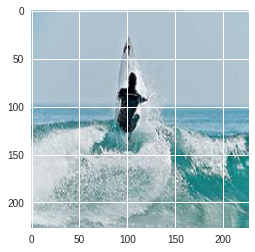

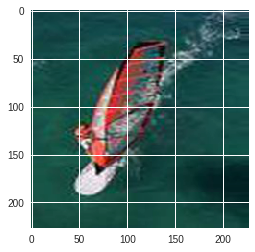

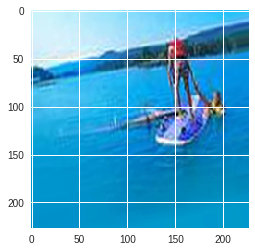

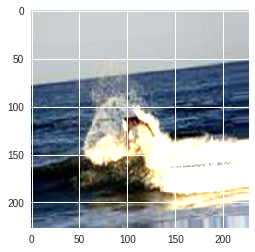

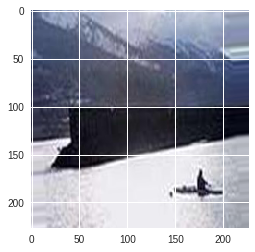

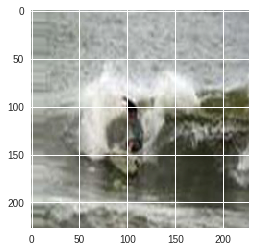

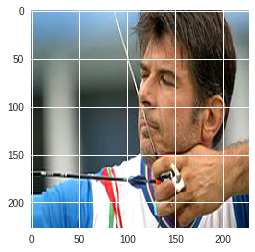

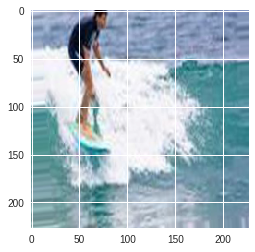

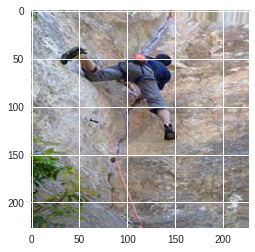

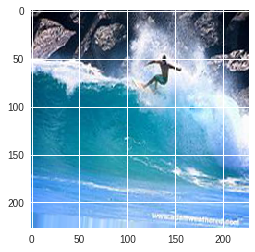

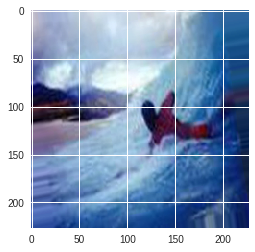

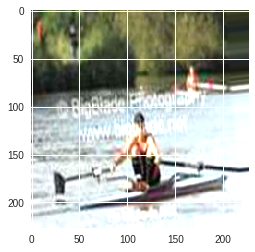

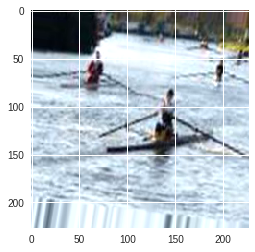

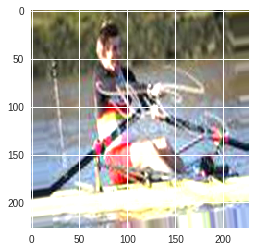

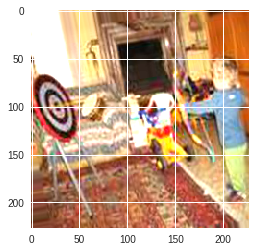

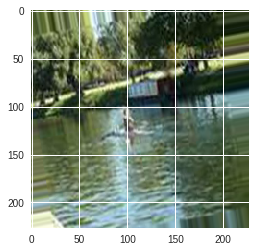

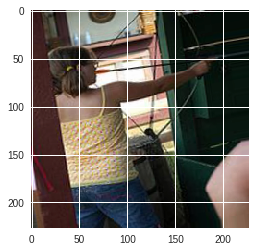

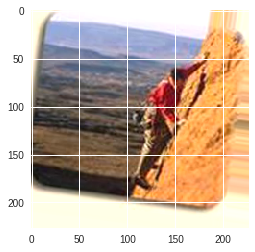

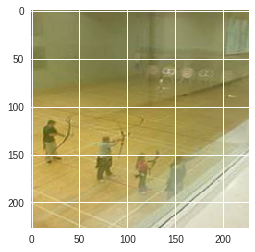

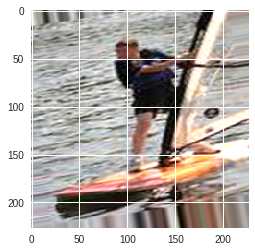

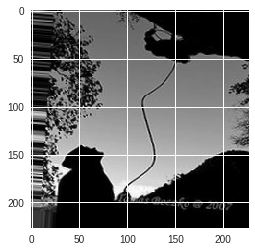

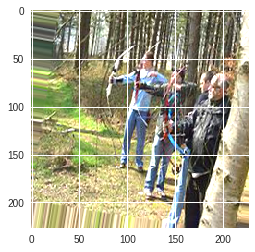

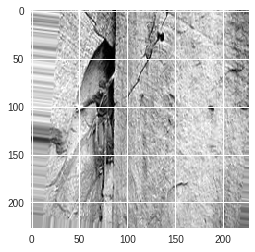

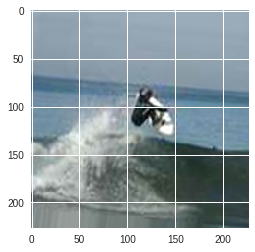

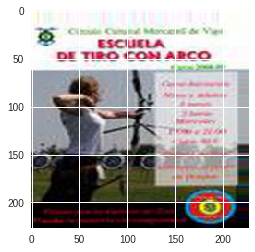

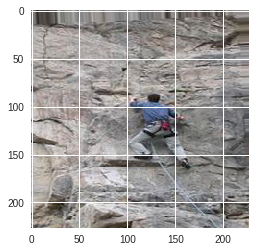

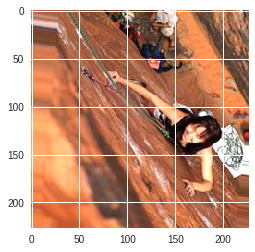

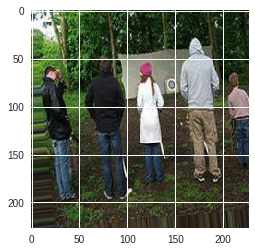

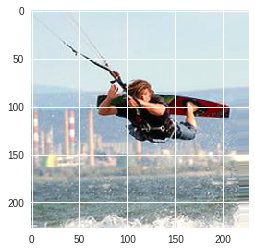

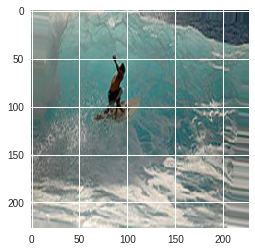

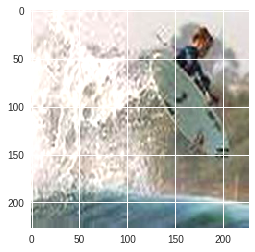

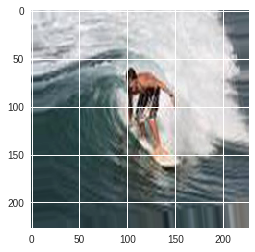

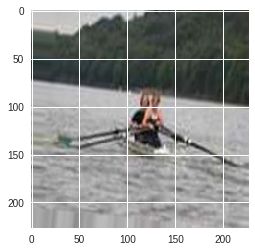

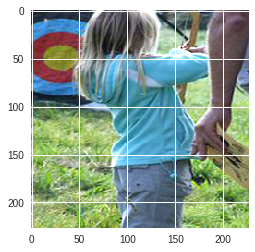

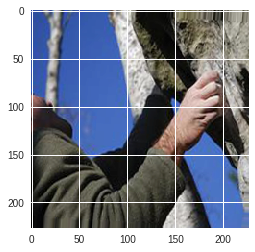

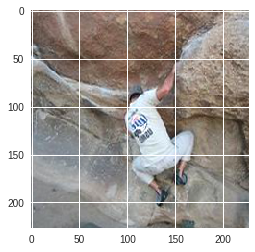

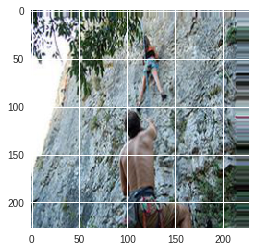

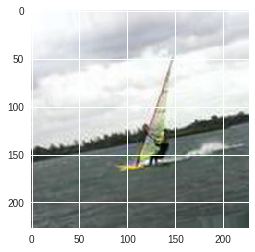

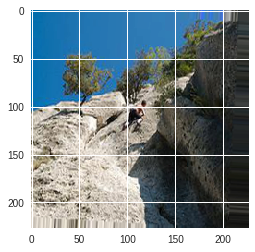

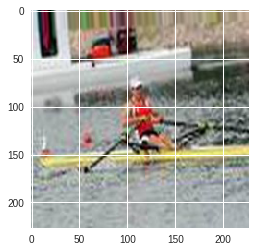

In [29]:
import sys
from keras.preprocessing.image import ImageDataGenerator, array_to_img, save_img
from matplotlib import pyplot as plt
import skimage.io as io
import os
from tqdm import tqdm

base_dir_processed = '/content/gdrive/My Drive/PWr_AlexNet_data/processed/'
data_set = 'no-padding/resize/'


image_gen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    brightness_range=(0.5,1.5),
    shear_range=0.01,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    validation_split=0.1
)

number_of_images_for_fit = -1

all_images = []
for class_name in os.listdir(base_dir_processed + data_set + 'train'):
  for image_path in tqdm(os.listdir(base_dir_processed + data_set + 'train/' + class_name)[:number_of_images_for_fit]):
    img = io.imread(base_dir_processed + data_set + 'train/' + class_name + '/' + image_path)
    all_images.append(img)
x_train = np.array(all_images)

image_gen.fit(x_train)

generator = image_gen.flow_from_directory(
    base_dir_processed + data_set + '/' + 'train',
        target_size=(227,227),
        batch_size=32,
        class_mode='categorical')

i=0
for x, y in generator:
    img = array_to_img(x[0,:,:,:])
    plt.figure()
    plt.imshow(img)
    i += 1
    if i==40:
        break